In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

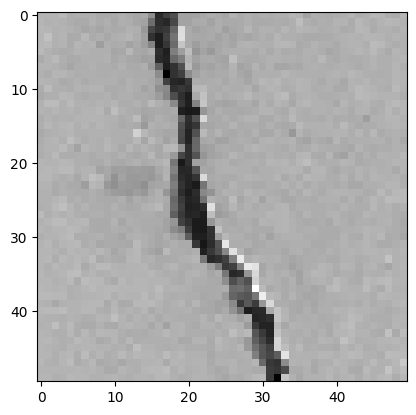

In [9]:
datadir = "D:\Downloads\Surface crack detection"
categories = ["positive", "negative"]
img_size = 50
for category in categories:
    path = os.path.join(datadir,category) #path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size,img_size))
        plt.imshow(new_array, cmap="gray")
        plt.show()
        break
    break


In [16]:
training_data = []

def create_training_data():
    for category in categories:                 #iterating through categories (pos and neg)
        path = os.path.join(datadir,category)   #path
        class_num = categories.index(category)  #0 and 1 for negatove positive
        for img in os.listdir(path):            #iterating through images in each category
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)    #reading pixels and assigning grayscale
                new_array = cv2.resize(img_array, (img_size,img_size))                  #resizing image
                training_data.append([new_array,class_num])                             #appending trainng data
            except Exception as e:
                pass

create_training_data()

In [17]:
print(len(training_data))

40000


In [18]:
import random
random.shuffle(training_data)

In [35]:
X = []
y = []


In [36]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size,img_size,1)

In [38]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()